In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

In [ ]:
df.info()

In [3]:
df.shape
print("Number of Rows" , df.shape[0])
print("Number of Columns" , df.shape[1])

Number of Rows 1025
Number of Columns 14


# Handling null values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.dup = df.duplicated().any()
print(df.dup)

True


In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(302, 14)

In [ ]:
Data processing

In [9]:
cat_val = []
con_val = []

for column in df.columns:
    if df[column].nunique()<=10:
        cat_val.append(column)
    else:
        con_val.append(column)

In [ ]:
cat_val

In [10]:
con_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding Categorical data

In [11]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
df["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
cat_val.remove('sex')
cat_val.remove('target')

In [14]:
df = pd.get_dummies(df,columns= cat_val,drop_first= True)

In [15]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Scaling

In [ ]:
df.head()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st= StandardScaler()
df[con_val]=st.fit_transform(df[con_val])

In [18]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting Dataset into Training and testing Set

In [19]:
X = df.drop('target', axis = 1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [28]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# A. Logisitic Regression

In [29]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
from sklearn.linear_model import LogisticRegression

In [35]:
l = LogisticRegression()
l.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred1= l.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# B. SVM

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [52]:
svm.fit(X_train,y_train)

SVC()

In [53]:
y_pred2 = svm.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# C.KNeighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred3 = knn.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [60]:
score = []

for k in range (1,40):
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [61]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

# Non - Linear ML Algorithms

In [62]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [63]:
df = df.drop_duplicates()

In [64]:
df.shape

(302, 14)

In [65]:
X= df.drop('target',axis = 1)
y = df['target']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

# A.Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred4 = dtc.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

# B. Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_pred5 = rf.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

# C. Gradient Boosting Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [91]:
y_pred6 = gb.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [93]:
final_data = pd.DataFrame({'Models': ['LR','SVM','KNN','DT','RF','GBC'],
                          'ACC': [accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [94]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.754098
4,RF,0.868852
5,GBC,0.803279


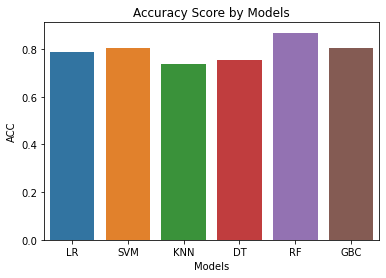

In [98]:
sns.barplot(final_data['Models'], final_data['ACC'])
plt.title("Accuracy Score by Models")
plt.show()

In [99]:
X= df.drop('target',axis = 1)
y = df['target']

In [101]:
X.shape

(302, 13)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Predicition On new data

In [103]:
new_data = pd.DataFrame({
    'age': 52,
    'sex':1,
    'cp': 0,
    'trestbps':135,
    'chol': 235,
    'fbs': 0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3 ,},
    index=[0])
    
    


In [104]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,135,235,0,1,168,0,1.0,2,2,3


In [105]:
p = rf.predict(new_data)
if p[0]==0 :
    print("No Disease")
else :
    print("Disease")

No Disease


# Save model using joblib

In [106]:
import joblib

In [107]:
joblib.dump(rf,'md_joblib_Heart')

['md_joblib_Heart']

In [108]:
model = joblib.load('md_joblib_Heart')

In [109]:
model.predict(new_data)

array([0], dtype=int64)